In [ ]:
#### Supervised Learning =  under the supervision of someone
### In this you will have the answers and you will train the data based on those answers and new data is predicted

In [ ]:
# ### Steps followed
# 1. Extracting the data
# 2. Preprocessing the data
# 3. Pattern analysis/EDA
# 4. Feature engineering
# 5. Model planning / building
# 6. Saving of the model

In [ ]:
# ##### Diagnostics of Regression
# 1. RSquare
# 2. RMSE
# 3. MAE/MSE

# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sns.get_dataset_names('healthexp')


In [3]:
def read_data():     #### Creating a function
    data = sns.load_dataset('healthexp')
    return data

In [4]:
df = read_data()    #### Calling the function
print(df.head())
print(df.info())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB
None


In [5]:
df1 = df.copy()     ### Copying the raw data, so use this copied data for transfrmations
print(df1.head())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9


In [6]:
### Exploratory Data Analysis (EDA)

df1['Year'].value_counts().sort_values( ascending = True)

Year
1972    3
1978    3
1973    3
1974    3
1977    3
1975    4
1976    4
1979    4
1971    5
1981    5
1982    5
1984    5
1983    5
1987    5
1988    5
1989    5
1991    5
1970    5
1986    5
1994    6
1990    6
1980    6
1992    6
1993    6
1985    6
1995    6
2019    6
2008    6
1998    6
1999    6
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
1997    6
2007    6
1996    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
2016    6
2017    6
2018    6
2009    6
2020    6
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

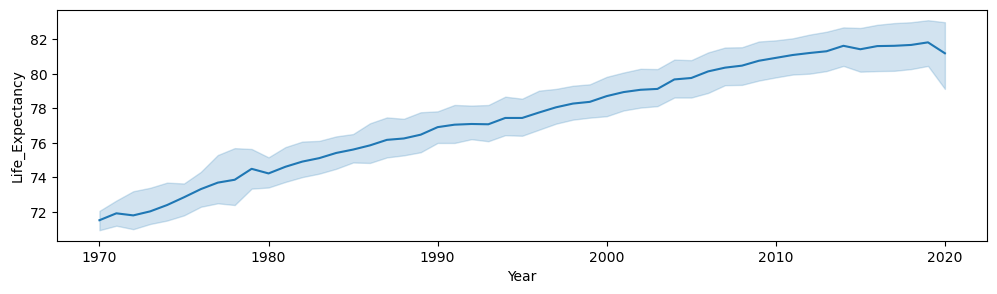

In [21]:
plt.figure(figsize=(12,3))    ##### In matplotlib it resizes the figure
sns.lineplot(x = 'Year', y = 'Life_Expectancy', data = df1 )

-0.20233768373091185
count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64


C:\Users\Rushikesh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


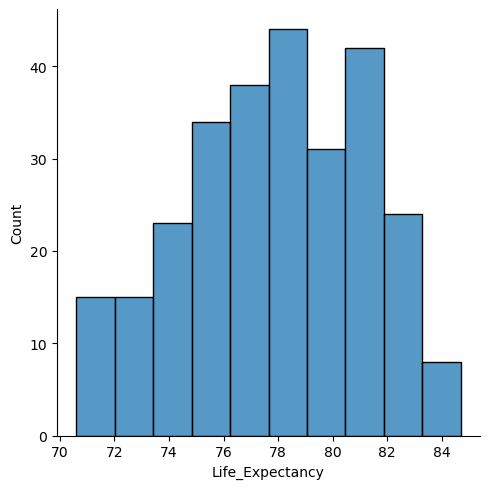

In [22]:
sns.displot(df1['Life_Expectancy'])
print(df1['Life_Expectancy'].skew())
print(df1['Life_Expectancy'].describe())

In [ ]:
#### Life expectancy is somewhat normally distributed

<Axes: xlabel='Life_Expectancy'>

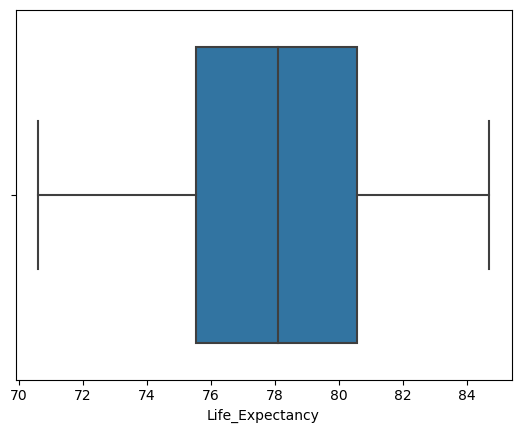

In [23]:
sns.boxplot(x = df1['Life_Expectancy'])    ###### No outliers at all (Normal distribution)

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

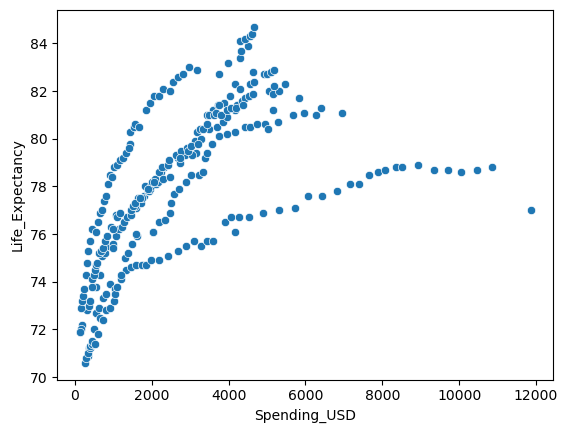

In [24]:
sns.scatterplot(x = 'Spending_USD', y = 'Life_Expectancy', data = df1)

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

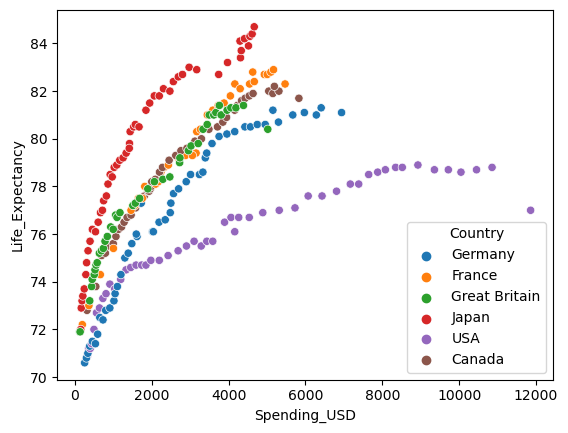

In [25]:
sns.scatterplot(x = 'Spending_USD', y = 'Life_Expectancy', hue = 'Country', data = df1)

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

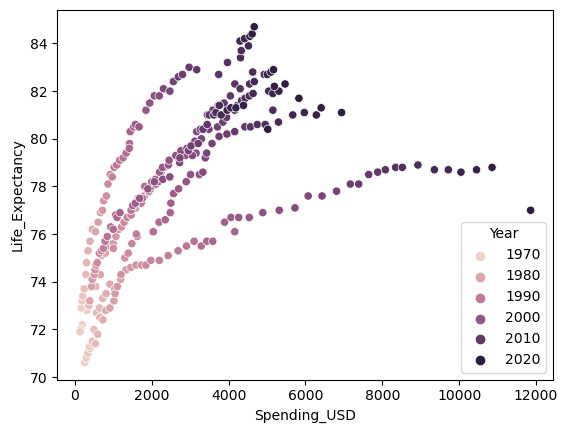

In [26]:
sns.scatterplot(x = 'Spending_USD', y = 'Life_Expectancy', hue = 'Year', data = df1)

In [27]:
df1[['Spending_USD', 'Life_Expectancy']].var()      ##### its in exponential form

Spending_USD       4.817761e+06
Life_Expectancy    1.073390e+01
dtype: float64

In [28]:
model_data = df1[['Spending_USD', 'Life_Expectancy']]
model_data

,Spending_USD,Life_Expectancy
0,252.311,70.6
1,192.143,72.2
2,123.993,71.9
3,150.437,72.0
4,326.961,70.9
...,...,...
269,6938.983,81.1
270,5468.418,82.3
271,5018.700,80.4
272,4665.641,84.7


In [29]:
model_data.corr()     ###### Data is positively correlated which means more the spending ,60% chances of life increased

,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.57943
Life_Expectancy,0.57943,1.00000


                                                        # Sampling the data  

In [31]:
### There are 2 methods for representing the data into Training and Testing

from sklearn.model_selection import train_test_split

    ### Method 1 

In [32]:
training, testing = train_test_split(model_data, train_size = 0.8)

In [33]:
training.shape

(219, 2)

In [34]:
testing.shape

(55, 2)

    #### method 2

In [35]:
X = model_data['Spending_USD']
Y = model_data['Life_Expectancy']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8)

In [37]:
x_train.shape,x_test.shape

((219,), (55,))

In [38]:
y_train.shape, y_test.shape

((219,), (55,))

In [39]:
x_train, y_train

(156    2875.294
 238    4635.285
 107    2040.313
 204    3880.842
 59     1196.560
          ...   
 42     1036.300
 157    2067.167
 47     1191.537
 126    2169.451
 237    8925.879
 Name: Spending_USD, Length: 219, dtype: float64,
 156    79.3
 238    81.9
 107    76.1
 204    81.5
 59     74.3
        ... 
 42     73.7
 157    78.2
 47     74.1
 126    78.2
 237    78.9
 Name: Life_Expectancy, Length: 219, dtype: float64)

In [44]:
# #### We have to convert these values in 1D array

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
print(x_train)
print(y_train)

[[ 2875.294]
 [ 4635.285]
 [ 2040.313]
 [ 3880.842]
 [ 1196.56 ]
 [ 3432.101]
 [ 3894.282]
 [10855.517]
 [  284.269]
 [ 4888.518]
 [ 3740.756]
 [ 1014.713]
 [ 2799.198]
 [  150.437]
 [ 2952.329]
 [ 3849.544]
 [  898.807]
 [  647.352]
 [ 5150.47 ]
 [ 6808.054]
 [  714.857]
 [ 1962.196]
 [  726.241]
 [ 4155.529]
 [  591.098]
 [ 1847.786]
 [ 9355.118]
 [ 3588.227]
 [  739.714]
 [ 5189.721]
 [  385.099]
 [ 1058.68 ]
 [ 1451.945]
 [ 8519.62 ]
 [ 4667.156]
 [ 1945.556]
 [ 9717.649]
 [ 4059.125]
 [ 3170.947]
 [ 1104.594]
 [ 1386.51 ]
 [ 3152.016]
 [ 2200.468]
 [ 2758.065]
 [ 4928.128]
 [ 1507.352]
 [ 3758.935]
 [ 2469.159]
 [ 2236.595]
 [ 1332.213]
 [ 1021.247]
 [  996.086]
 [  363.61 ]
 [  326.961]
 [ 1088.959]
 [ 3100.343]
 [ 3945.873]
 [  392.577]
 [  549.608]
 [ 1999.778]
 [  659.826]
 [ 2091.997]
 [ 1579.543]
 [  448.477]
 [ 3970.765]
 [  800.703]
 [ 7879.253]
 [ 4328.364]
 [ 1724.332]
 [ 3960.141]
 [  205.778]
 [  791.812]
 [11859.179]
 [  501.924]
 [ 5316.522]
 [ 6281.84 ]
 [  303.725]

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()
model_fit = model.fit(x_train, y_train)    #### Trained splitted data

In [31]:
model_fit.coef_     ###### slope

array([[0.00083627]])

In [32]:
model_fit.intercept_     ####constant

array([75.62541631])

In [47]:
x_test = x_test.values.reshape(-1,1)     ### NO need to reshape in Multi-dimensional arrays

In [48]:
x_test

array([[ 1094.034],
       [ 4412.852],
       [ 2731.445],
       [ 1171.591],
       [  340.628],
       [ 2349.145],
       [ 6407.928],
       [ 5468.418],
       [  808.884],
       [  664.777],
       [ 3955.136],
       [ 3709.615],
       [10046.472],
       [ 4610.794],
       [ 2566.003],
       [  969.251],
       [ 4951.677],
       [ 1459.11 ],
       [ 4158.266],
       [ 1699.774],
       [ 1480.096],
       [ 2471.186],
       [ 4158.928],
       [ 3056.265],
       [  433.957],
       [ 2496.201],
       [ 1683.905],
       [  439.302],
       [  532.481],
       [ 5151.709],
       [ 2100.918],
       [  397.097],
       [ 2065.133],
       [ 2914.206],
       [ 1558.033],
       [  185.39 ],
       [ 3750.787],
       [ 5099.306],
       [  692.269],
       [ 1461.3  ],
       [ 3286.558],
       [ 5018.7  ],
       [ 5308.356],
       [ 5295.975],
       [ 3667.636],
       [  313.391],
       [ 1329.669],
       [10451.386],
       [ 1436.372],
       [ 3239.77 ],


In [49]:
predicted_y_test_values = model_fit.predict(x_test)      #### predicting y_test values using x-test
predicted_y_test_values                                    ### predicted values of y using answers

array([[76.45229184],
       [79.2805016 ],
       [77.8476506 ],
       [76.51838388],
       [75.81025898],
       [77.52186455],
       [80.98065311],
       [80.18002729],
       [76.20929448],
       [76.08649027],
       [78.89044801],
       [78.68122145],
       [84.08132499],
       [79.44918259],
       [77.70666526],
       [76.34595503],
       [79.73967415],
       [76.76340004],
       [79.06355008],
       [76.9684876 ],
       [76.78128376],
       [77.6258647 ],
       [79.06411422],
       [78.12445369],
       [75.88979151],
       [77.64718182],
       [76.95496445],
       [75.89434638],
       [75.97375108],
       [79.91013618],
       [77.31033201],
       [75.85838038],
       [77.27983697],
       [78.00339474],
       [76.84769963],
       [75.67796922],
       [78.71630715],
       [79.86547972],
       [76.10991823],
       [76.7652663 ],
       [78.32070336],
       [79.79678939],
       [80.04362665],
       [80.03307589],
       [78.64544805],
       [75

In [50]:
y_test       #### Actual y_test values

121    76.7
254    84.2
181    79.2
127    76.9
28     75.3
119    76.6
263    81.3
270    82.3
32     73.5
51     76.9
197    80.2
190    80.5
255    78.6
266    84.4
137    77.7
82     78.4
227    80.6
91     77.0
203    80.3
89     77.3
75     75.6
182    82.0
129    76.1
168    79.3
45     73.8
131    77.3
145    77.5
15     71.4
19     71.4
233    81.2
120    78.1
12     71.2
164    81.8
166    79.6
96     77.2
11     73.2
191    80.1
258    82.8
33     75.1
79     76.8
111    75.5
271    80.4
256    82.0
239    80.7
229    81.1
5      72.8
52     74.5
261    78.7
128    80.3
161    78.5
46     76.5
101    76.1
73     74.7
244    82.0
74     76.7
Name: Life_Expectancy, dtype: float64

In [62]:
df_pred = pd.DataFrame(predicted_y_test_values, columns = ['predicted_y_test_values'])      ### Creating new column in dataframe
df_pred

,predicted_y_test_values
0,76.452292
1,79.280502
2,77.847651
3,76.518384
4,75.810259
5,77.521865
6,80.980653
7,80.180027
8,76.209294
9,76.086490


In [63]:
df_pred['actual_y_test_values'] = y_test.values  ##### listing y_test values as Actual

In [64]:
df_pred

,predicted_y_test_values,actual_y_test_values
0,76.452292,76.7
1,79.280502,84.2
2,77.847651,79.2
3,76.518384,76.9
4,75.810259,75.3
5,77.521865,76.6
6,80.980653,81.3
7,80.180027,82.3
8,76.209294,73.5
9,76.086490,76.9


In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [66]:
r2_score(df_pred['actual_y_test_values'], df_pred['predicted_y_test_values'])
# r2_score(df_pred['predicted_y_test_values'], df_pred['actual_y_test_values'])    if written like this r2 is negative

0.39863132316639205

In [139]:
mean_squared_error(df_pred['actual_y_test_values'], df_pred['predicted_y_test_values'])

5.611902409544309

In [140]:
sqrt(mean_squared_error(df_pred['actual_y_test_values'], df_pred['predicted_y_test_values']))

2.3689454213941503

In [67]:
pd.get_dummies(df1['Country'])   #### Return whichever comes first in main column as true and others as false 

                                  #### it happens for all values forward

,Canada,France,Germany,Great Britain,Japan,USA
0,False,False,True,False,False,False
1,False,True,False,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
269,False,False,True,False,False,False
270,False,True,False,False,False,False
271,False,False,False,True,False,False
272,False,False,False,False,True,False


In [71]:
dummy = pd.get_dummies(df1['Country']).astype('int')     #### Converts above in integers
dummy

,Canada,France,Germany,Great Britain,Japan,USA
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
269,0,0,1,0,0,0
270,0,1,0,0,0,0
271,0,0,0,1,0,0
272,0,0,0,0,1,0


In [73]:
df2 = pd.concat([df1,dummy], axis = 1)

In [72]:
df2

,Year,Country,Spending_USD,Life_Expectancy,Canada,France,Germany,Great Britain,Japan,USA
0,1970,Germany,252.311,70.6,0,0,1,0,0,0
1,1970,France,192.143,72.2,0,1,0,0,0,0
2,1970,Great Britain,123.993,71.9,0,0,0,1,0,0
3,1970,Japan,150.437,72.0,0,0,0,0,1,0
4,1970,USA,326.961,70.9,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,0,0,1,0,0,0
270,2020,France,5468.418,82.3,0,1,0,0,0,0
271,2020,Great Britain,5018.700,80.4,0,0,0,1,0,0
272,2020,Japan,4665.641,84.7,0,0,0,0,1,0


In [74]:
X = df2[['Spending_USD', 'Canada', 'France', 'Germany', 'Great Britain', 'Japan', 'USA' ]]

In [75]:
Y = df2['Life_Expectancy']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8)

In [77]:

model_fiit = model.fit(x_train,y_train)

In [78]:
pred1_y_test = model_fiit.predict(x_test)      ### predict using answers of x_test
pred1_y_test

array([77.95670345, 76.99612549, 78.53642941, 73.63830158, 78.2202649 ,
       72.0073598 , 79.43781211, 71.51079494, 79.81370523, 75.95320426,
       77.15287176, 79.81535669, 70.52241776, 72.18712118, 82.5571989 ,
       82.18324312, 79.15169631, 79.29776014, 75.25573401, 78.77866916,
       81.0732006 , 83.12957606, 77.69430277, 79.83110345, 74.05620973,
       76.23928424, 79.90107713, 71.15923952, 78.3009509 , 76.54841648,
       77.56914625, 76.80255746, 82.52737983, 75.90599811, 77.15430697,
       79.23732746, 77.74686801, 80.47244085, 79.53966754, 79.82369773,
       74.49071656, 71.83477325, 71.03472942, 77.88161595, 77.38133862,
       75.80866737, 76.6815309 , 78.47886703, 76.31635429, 74.87332891,
       78.64259747, 70.57492577, 79.6920678 , 75.2351547 , 71.31766178])

In [79]:
df3 = pd.DataFrame(pred1_y_test, columns = ['Predicted'])
df3

,Predicted
0,77.956703
1,76.996125
2,78.536429
3,73.638302
4,78.220265
5,72.007360
6,79.437812
7,71.510795
8,79.813705
9,75.953204


In [80]:
# df3['Actual'] = y_test.values
# df3

,Predicted,Actual
0,77.956703,76.2
1,76.996125,78.2
2,78.536429,78.6
3,73.638302,75.5
4,78.220265,76.9
5,72.007360,74.7
6,79.437812,81.0
7,71.510795,74.1
8,79.813705,81.5
9,75.953204,72.8


In [188]:
r2_score(df3['Actual'], df3['Predicted'])    #### Accuracy of prediction

0.7987637442917315

In [186]:
mean_squared_error(df3['Actual'], df3['Predicted'])

2.0524607936085415

In [187]:
sqrt(mean_squared_error(df3['Actual'], df3['Predicted']))

1.4326411949991322

In [84]:
#### Saving the model for future references
#### we can immport joblib to save the model and load that model for future data predictions

import joblib

In [85]:
filename = 'joblib_regr_model.sav'

In [86]:
joblib.dump(model_fiit, filename)

['joblib_regr_model.sav']

In [87]:
### Loading the model for future predictions

load_model = joblib.load(filename)
print(load_model)

LinearRegression()


In [88]:
y_predict = load_model.predict(x_test)
print(y_predict)

[77.95670345 76.99612549 78.53642941 73.63830158 78.2202649  72.0073598
 79.43781211 71.51079494 79.81370523 75.95320426 77.15287176 79.81535669
 70.52241776 72.18712118 82.5571989  82.18324312 79.15169631 79.29776014
 75.25573401 78.77866916 81.0732006  83.12957606 77.69430277 79.83110345
 74.05620973 76.23928424 79.90107713 71.15923952 78.3009509  76.54841648
 77.56914625 76.80255746 82.52737983 75.90599811 77.15430697 79.23732746
 77.74686801 80.47244085 79.53966754 79.82369773 74.49071656 71.83477325
 71.03472942 77.88161595 77.38133862 75.80866737 76.6815309  78.47886703
 76.31635429 74.87332891 78.64259747 70.57492577 79.6920678  75.2351547
 71.31766178]
